# Análise de dados de operadoras de crédito

In [8]:
df <- read.csv('credito.csv', header = TRUE, sep = ';')
df$valor <- as.double(df$valor)
df

Warning message in eval(expr, envir, enclos):
"NAs introduzidos por coerção"


dia,quantidade,valor
<int>,<int>,<dbl>
1,1,268.90
2,2,304.63
3,0,NA
4,1,161.22
5,3,190.97
6,3,110.03
7,1,98.31
8,3,317.18
9,2,202.15


In [12]:
df$valor[is.na(df$valor)] <- 0
df

dia,quantidade,valor
<int>,<int>,<dbl>
1,1,268.90
2,2,304.63
3,0,0.00
4,1,161.22
5,3,190.97
6,3,110.03
7,1,98.31
8,3,317.18
9,2,202.15


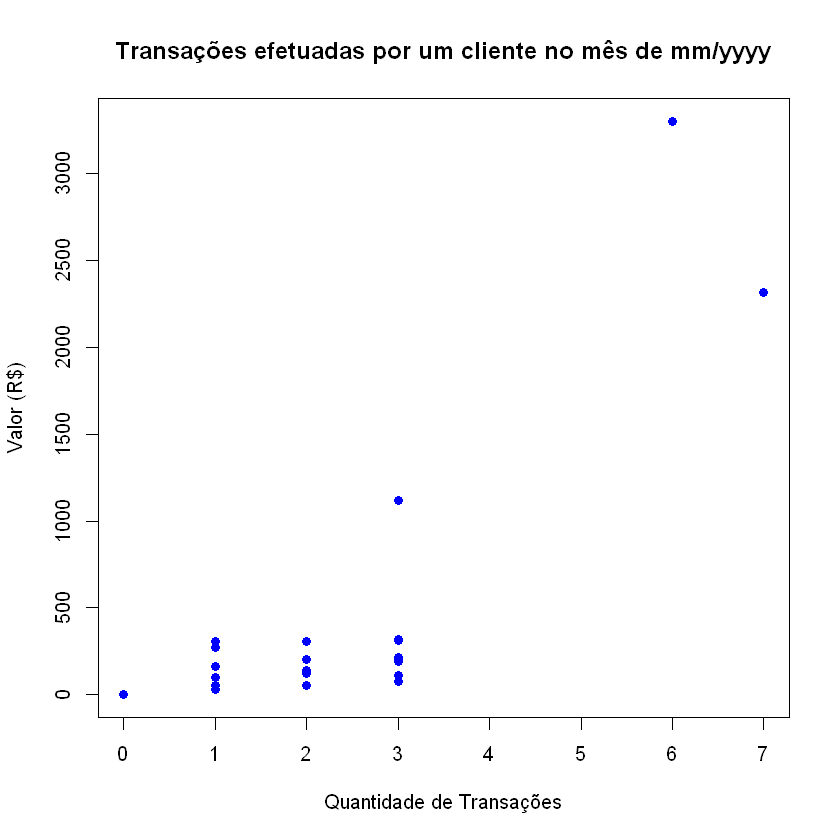

In [32]:
plot(df$quantidade, df$valor,
     col = "blue", pch = 19, 
     xlab = "Quantidade de Transações", ylab = "Valor (R$)",
     main = "Transações efetuadas por um cliente no mês de mm/yyyy", )

Observamos que existem três transações atípicas quando comparadas com as demais. Tais operações ocorreram nos três últimos dias do mês:

In [42]:
df[df$valor %in% sort(df$valor, decreasing = TRUE)[1:3], ]

,dia,quantidade,valor
,<int>,<int>,<dbl>
28,28,3,1121.18
29,29,6,3303.11
30,30,7,2318.03


A seguir é criada uma nova coluna de dados do valor total das operações em cada uma dos dias do mês:

In [43]:
df$total <- df$quantidade * df$valor
df

dia,quantidade,valor,total
<int>,<int>,<dbl>,<dbl>
1,1,268.90,268.90
2,2,304.63,609.26
3,0,0.00,0.00
4,1,161.22,161.22
5,3,190.97,572.91
6,3,110.03,330.09
7,1,98.31,98.31
8,3,317.18,951.54
9,2,202.15,404.30


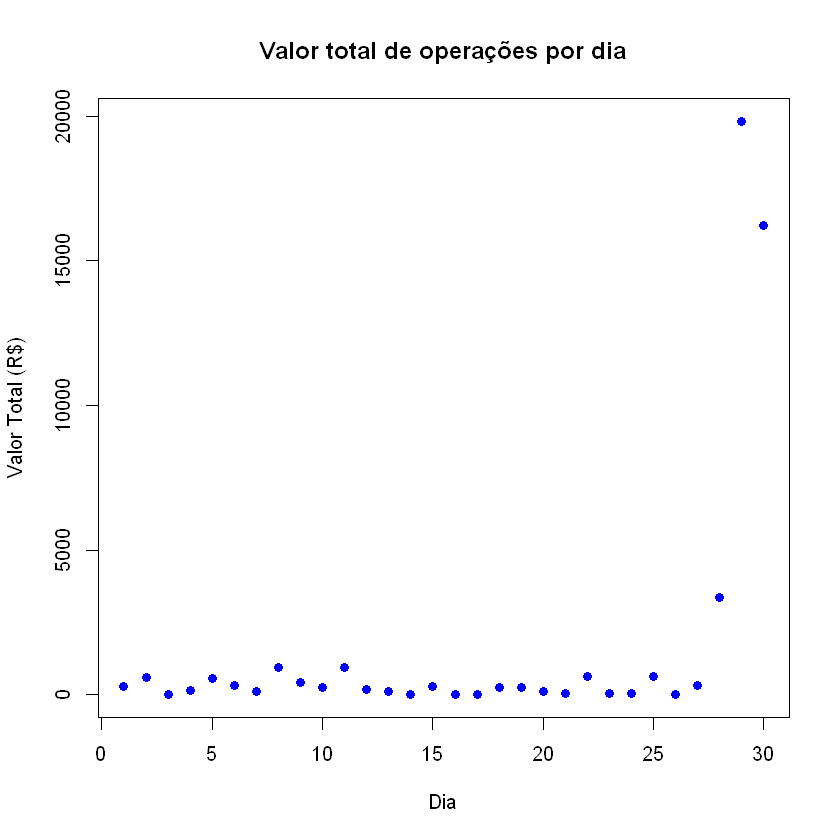

In [46]:
plot(df$dia, df$total,
     col = "blue", pch = 19, 
     xlab = "Dia", ylab = "Valor Total (R$)",
     main = "Valor total de operações por dia", )

Quando se cria o gráfico do valor total das operações por dia, estas operações destacam-se do fluxo habitual do cliente, o que indica se tratar de operações fraudulentas.